In [1]:
import logging
import pandas as pd
import sys
import os
from dotenv import load_dotenv

# Setup logging
logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)

# Add parent to path
sys.path.insert(0, os.path.abspath('..'))

from product_catalog import PRODUCT_CATALOG
from modules.evaluation import run_cluster_evaluation_pipeline, run_random_baseline_pipeline

In [2]:
load_dotenv()

API_KEY = os.getenv('CEREBRAS_API_KEY')

if not API_KEY:
    raise ValueError("CEREBRAS_API_KEY not found in environment variables. Please check your .env file.")

In [3]:
clustered_df = pd.read_parquet('../data/financial_data_clustered.parquet')
clustered_df['customer_id'] = clustered_df.index + 1

In [ ]:
evaluation_summary, evaluation_raw = run_cluster_evaluation_pipeline(
    clustered_df=clustered_df,
    product_catalog=PRODUCT_CATALOG,
    api_key=API_KEY,
    n_iterations=5,
    sample_size=30,
    save_results=True,
    prefix = "cluster_eval_1"
)

In [5]:
cluster_eval_df = pd.read_parquet('../data/1_agent_evaluation/cluster_eval_1_raw.parquet')

cluster_eval_df

,cluster,product_key,product_name,iteration,acceptance_rate,avg_satisfaction,sample_size
0,0,SmartLink_Offset,SmartLink Offset,1,0.655172,7.275862,29
1,0,SmartLink_Offset,SmartLink Offset,2,0.500000,6.500000,30
2,0,SmartLink_Offset,SmartLink Offset,3,0.689655,6.827586,29
3,0,SmartLink_Offset,SmartLink Offset,4,0.733333,7.400000,30
4,0,SmartLink_Offset,SmartLink Offset,5,0.633333,6.800000,30
...,...,...,...,...,...,...,...
60,12,YieldMax_Accelerator,YieldMax Accelerator,1,1.000000,7.300000,30
61,12,YieldMax_Accelerator,YieldMax Accelerator,2,1.000000,8.566667,30
62,12,YieldMax_Accelerator,YieldMax Accelerator,3,1.000000,9.000000,29
63,12,YieldMax_Accelerator,YieldMax Accelerator,4,1.000000,9.000000,29


2026-01-03 23:03:44,775 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_41273/760744874.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
2026-01-03 23:03:44,778 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2026-01-03 23:03:44,840 - matplotlib.category - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type be

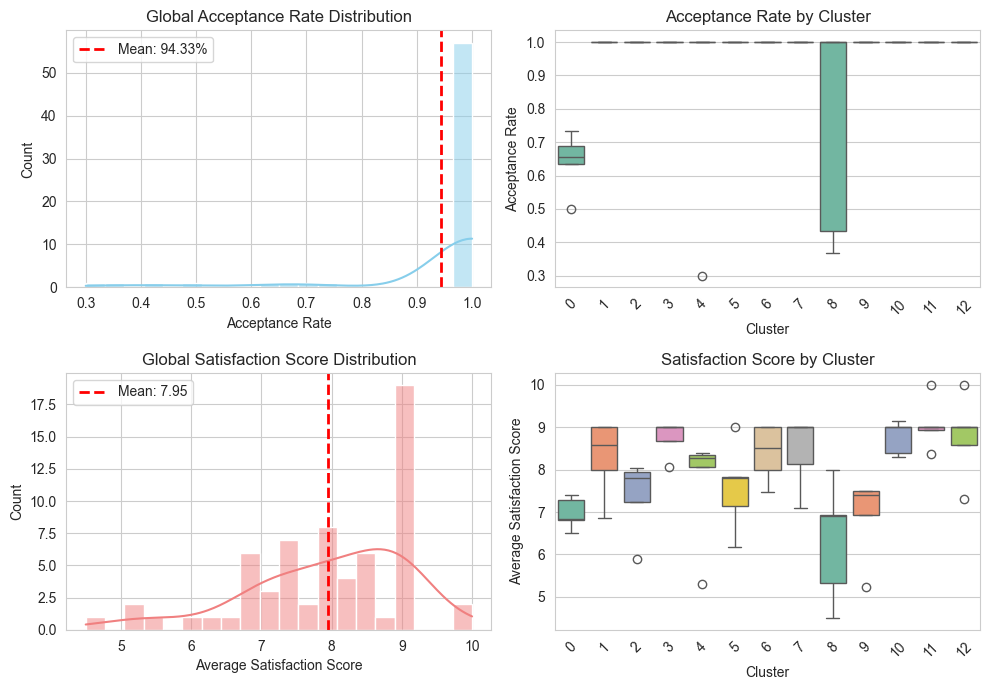

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 7))

# 1. Global Acceptance Rate Distribution
ax1 = axes[0, 0]
sns.histplot(
    data=cluster_eval_df,
    x='acceptance_rate',
    bins=20,
    kde=True,
    color='skyblue',
    ax=ax1
)
ax1.axvline(
    cluster_eval_df['acceptance_rate'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Mean: {cluster_eval_df['acceptance_rate'].mean():.2%}"
)
ax1.set_xlabel('Acceptance Rate')
ax1.set_ylabel('Count')
ax1.set_title('Global Acceptance Rate Distribution')
ax1.legend()

# 2. Acceptance Rate by Cluster
ax2 = axes[0, 1]
sns.boxplot(
    data=cluster_eval_df,
    x='cluster',
    y='acceptance_rate',
    palette='Set2',
    ax=ax2
)
ax2.set_xlabel('Cluster')
ax2.set_ylabel('Acceptance Rate')
ax2.set_title('Acceptance Rate by Cluster')
ax2.tick_params(axis='x', rotation=45)

# 3. Global Satisfaction Score Distribution
ax3 = axes[1, 0]
sns.histplot(
    data=cluster_eval_df,
    x='avg_satisfaction',
    bins=20,
    kde=True,
    color='lightcoral',
    ax=ax3
)
ax3.axvline(
    cluster_eval_df['avg_satisfaction'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Mean: {cluster_eval_df['avg_satisfaction'].mean():.2f}"
)
ax3.set_xlabel('Average Satisfaction Score')
ax3.set_ylabel('Count')
ax3.set_title('Global Satisfaction Score Distribution')
ax3.legend()

# 4. Satisfaction Score by Cluster
ax4 = axes[1, 1]
sns.boxplot(
    data=cluster_eval_df,
    x='cluster',
    y='avg_satisfaction',
    palette='Set2',
    ax=ax4
)
ax4.set_xlabel('Cluster')
ax4.set_ylabel('Average Satisfaction Score')
ax4.set_title('Satisfaction Score by Cluster')
ax4.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [ ]:

baseline_summary, baseline_raw = run_random_baseline_pipeline(
    clustered_df=clustered_df,
    product_catalog=PRODUCT_CATALOG,
    api_key=API_KEY,
    n_iterations=5,
    sample_size_per_product=30,
    save_results=True,
    prefix="base_eval_1"
)

In [10]:
base_eval_df = pd.read_parquet('../data/1_agent_evaluation/base_eval_1_raw.parquet')

base_eval_df

,product_key,product_name,iteration,acceptance_rate,avg_satisfaction,sample_size
0,Apex_Rewards_Signature,Apex Rewards Signature,1,1.000000,6.600000,30
1,Apex_Rewards_Signature,Apex Rewards Signature,2,1.000000,7.166667,30
2,Apex_Rewards_Signature,Apex Rewards Signature,3,1.000000,6.266667,30
3,Apex_Rewards_Signature,Apex Rewards Signature,4,1.000000,5.466667,30
4,Apex_Rewards_Signature,Apex Rewards Signature,5,1.000000,6.766667,30
...,...,...,...,...,...,...
56,CashBack_Refinance,Cash-Back Refinance,1,0.500000,6.500000,30
57,CashBack_Refinance,Cash-Back Refinance,2,0.333333,5.666667,30
58,CashBack_Refinance,Cash-Back Refinance,3,0.366667,5.833333,30
59,CashBack_Refinance,Cash-Back Refinance,4,0.433333,6.166667,30


/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_41273/349981071.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/8f/6znkn6r55qj5dgt5vxxlvwjm0000gn/T/ipykernel_41273/349981071.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


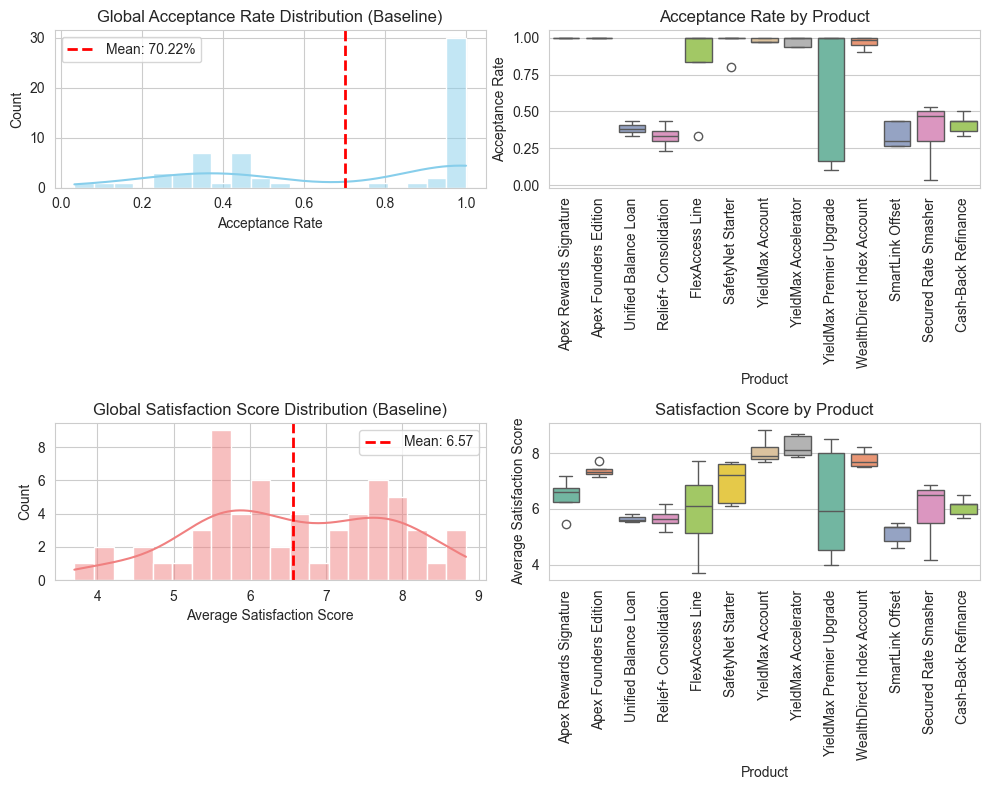

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

# 1. Global Acceptance Rate Distribution
ax1 = axes[0, 0]
sns.histplot(
    data=base_eval_df,
    x='acceptance_rate',
    bins=20,
    kde=True,
    color='skyblue',
    ax=ax1
)
ax1.axvline(
    base_eval_df['acceptance_rate'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Mean: {base_eval_df['acceptance_rate'].mean():.2%}"
)
ax1.set_xlabel('Acceptance Rate')
ax1.set_ylabel('Count')
ax1.set_title('Global Acceptance Rate Distribution (Baseline)')
ax1.legend()

# 2. Acceptance Rate by Product
ax2 = axes[0, 1]
sns.boxplot(
    data=base_eval_df,
    x='product_name',
    y='acceptance_rate',
    palette='Set2',
    ax=ax2
)
ax2.set_xlabel('Product')
ax2.set_ylabel('Acceptance Rate')
ax2.set_title('Acceptance Rate by Product')
ax2.tick_params(axis='x', rotation=90)

# 3. Global Satisfaction Score Distribution
ax3 = axes[1, 0]
sns.histplot(
    data=base_eval_df,
    x='avg_satisfaction',
    bins=20,
    kde=True,
    color='lightcoral',
    ax=ax3
)
ax3.axvline(
    base_eval_df['avg_satisfaction'].mean(),
    color='red',
    linestyle='--',
    linewidth=2,
    label=f"Mean: {base_eval_df['avg_satisfaction'].mean():.2f}"
)
ax3.set_xlabel('Average Satisfaction Score')
ax3.set_ylabel('Count')
ax3.set_title('Global Satisfaction Score Distribution (Baseline)')
ax3.legend()

# 4. Satisfaction Score by Product
ax4 = axes[1, 1]
sns.boxplot(
    data=base_eval_df,
    x='product_name',
    y='avg_satisfaction',
    palette='Set2',
    ax=ax4
)
ax4.set_xlabel('Product')
ax4.set_ylabel('Average Satisfaction Score')
ax4.set_title('Satisfaction Score by Product')
ax4.tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()